<img src="1573f31cc5db5be77453d401a0f588f9.jpg" alt="Cat" width="500">


## 1. Introduction:
### Bank Credit Project 💰
- the following project focus on the analysis of a dataset 'Bank Marketing' which contains data about customers and aims to get useful insights from the data and predict if a new customer will accept a deposit offer or not.

- The project is structured as follows:
   - Import Libraries 📚
   - Data Understanding 🐝
   
   - Explore every feature in the dataset(EDA)📊
   - Data preparation for ML algorithms (encoding) 🛠
   - Building and training Model 0️⃣1️⃣
   - Results Summary 📝


### Our Data :
1- age: The age of the customer</br>
2- job: customer is profession</br>
3 - marital: marital status</br>
4 - education: educational status</br>
5 - balance: bank balance</br>
6 - housing: has housing loan? </br>
7 - campaign: number of contacts performed during this campaign and for this client </br>
8 - deposit: did the customer get a loan? </br>
9 - duration: contact time in seconds </br>
10 - month: last contact month of year </br>
11 - day: last contact day of the week </br>
12 - pdays: number of days that passed by after the client was last contacted from a previous campaign</br>
13 - previous: number of contacts performed before this campaign and for this client </br>
14 - poutcome: outcome of the previous marketing campaign </br>
15 - loan: has personal loan? </br>
16 - default: has credit in default?

## 2. Libraries 📚

In [1]:
# Stsandard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import time
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
import scipy
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import IsolationForest

# Modeling
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import ExtraTreesClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, cross_val_predict, \
                                    learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, \
    accuracy_score, precision_score, recall_score, f1_score , auc

## 3. Loading & Understanding Data 🐝

In [2]:
#Lets load the dataset and sample some
# loading the dataset to pandas dataframe
df = pd.read_csv("bank.csv")
# Success
print("dataset has {} data points with {} variables each.".format(*df.shape))

dataset has 11162 data points with 17 variables each.


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
#checking the number of rows and columns in dataframe 
print(df.shape)

(11162, 17)


In [6]:
#check missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
# Get information about DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [8]:
# Count the number of unique values in each column
num_unique = df.nunique()
# Print the results
print(num_unique)  

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64


In [9]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [10]:
print('*All categorical features and their distinct values* \n')
for c in cat_cols:
    
    print(c , ' --> ',df[c].unique())
    print()

*All categorical features and their distinct values* 

job  -->  ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

marital  -->  ['married' 'single' 'divorced']

education  -->  ['secondary' 'tertiary' 'primary' 'unknown']

default  -->  ['no' 'yes']

housing  -->  ['yes' 'no']

loan  -->  ['no' 'yes']

contact  -->  ['unknown' 'cellular' 'telephone']

month  -->  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome  -->  ['unknown' 'other' 'failure' 'success']

deposit  -->  ['yes' 'no']



In [11]:
# statistical measure of dataset
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


- **Insight📊:**

  - The dataset contains 11162 data points with 17 columns. 
  - No Null Values.
  - Dataset contain 10 objects column and 7 numeric.
  - Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
  - The mean balance is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.
  - Target column contain two Values (YES , NO)

## 4. Explore every feature in the dataset(EDA) 📊

### 1. Correlation

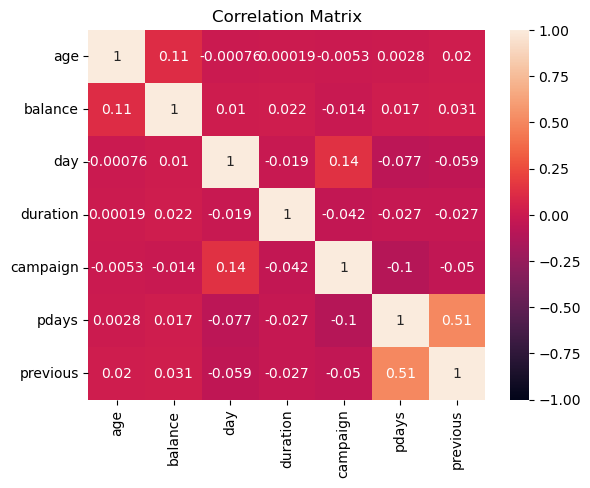

In [12]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### 2. Analysis of Numerical Variables

In [13]:
num_features = df.select_dtypes(include=['int64', 'float64'])

In [14]:
# Creat a function for numerical analysis
def num_plot(df, col, title, symb):
    # Create subplots for boxplot and histogram
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 5), gridspec_kw={"height_ratios": (.2, .8)})

    # Set title for the top subplot
    ax[0].set_title(title, fontsize=18)

    # Create a boxplot on the top subplot
    sns.boxplot(x=col, data=df, ax=ax[0], color="#1D8EF5")

    # Remove y-axis ticks from the top subplot
    ax[0].set(yticks=[])

    # Create a histogram on the bottom subplot
    sns.histplot(x=col, data=df, ax=ax[1], color="#33AAFF", edgecolor="#1D1EA2")

    # Set the x-axis label for the histogram subplot
    ax[1].set_xlabel(col, fontsize=16)

    # Add vertical lines for mean, median, and mode values
    plt.axvline(df[col].mean(), color='darkgreen', linestyle='--', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(), 1)) + symb)
    plt.axvline(df[col].median(), color='red', linestyle='--', linewidth=2.2, label='median=' + str(np.round(df[col].median(), 1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linestyle='--', linewidth=2.2, label='mode=' + str(np.round(df[col].mode()[0], 1)) + symb)

    # Add legend to the plot
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)

    # Adjust layout for better visualization
    plt.tight_layout()

    # Display the plot
    plt.show()

**Age analysis**

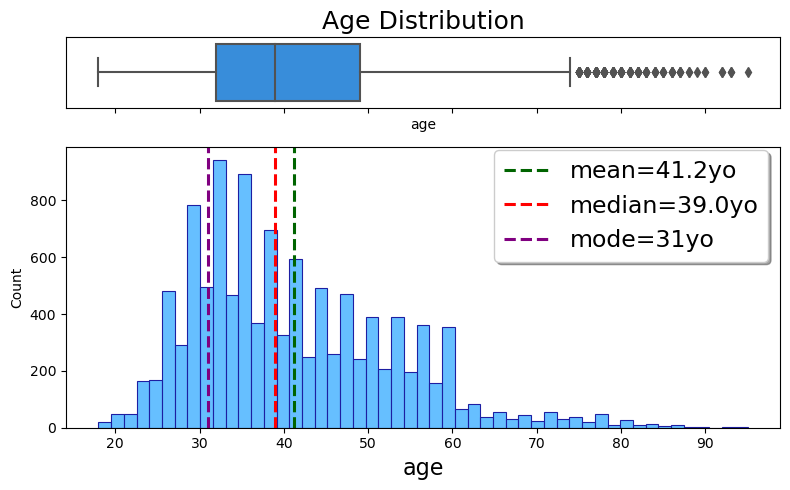

In [15]:
num_plot(df, 'age', 'Age Distribution', 'yo')

- **Insight📊:**
  - The distribution of 'Age' is right skewed with some outliers
  - Mean Age is  41 years old. (Minimum: 18 years old and Maximum: 95 years old.)

**Balance Analysis**

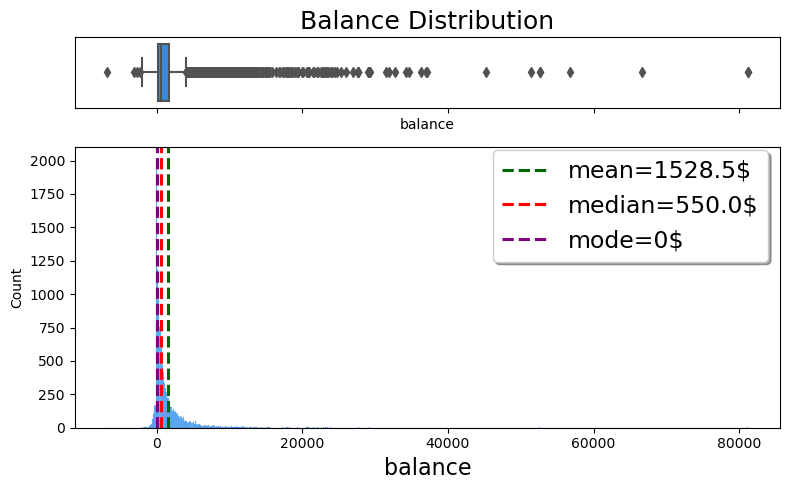

In [16]:
num_plot(df, 'balance', 'Balance Distribution', '$')

- **Insight📊:**
  - The distribution is heavily right skewed, with some negative values and outliers!.

**Campaign analysis**

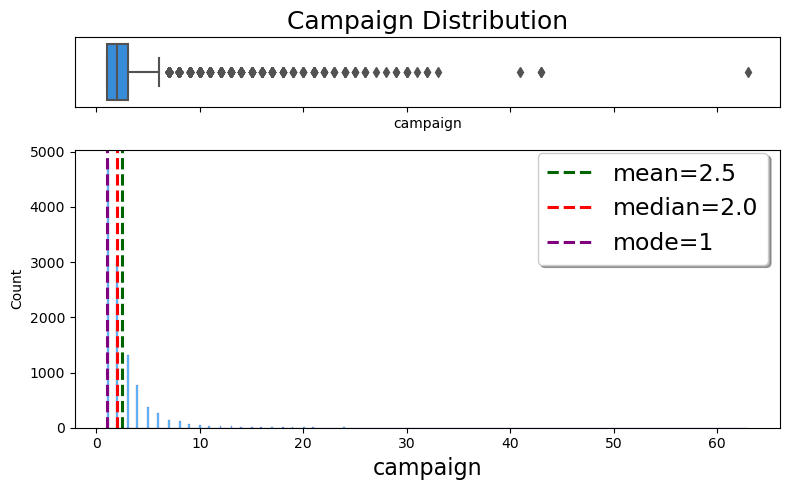

In [17]:
num_plot(df, 'campaign', 'Campaign Distribution', '')

**pdays Analysis**

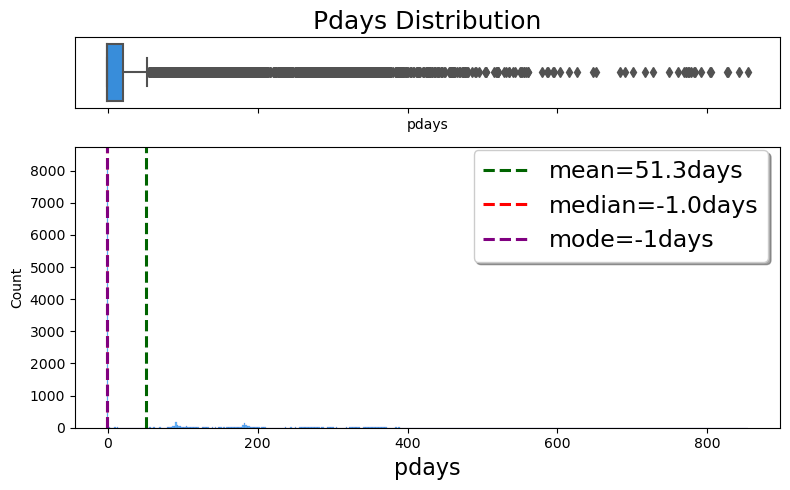

In [18]:
num_plot(df, 'pdays', 'Pdays Distribution', 'days')

- **Insight📊:**
     - The great majority of customers in the dataset have pdays=-1 (not previously contacted)

**Duration Analysis**   

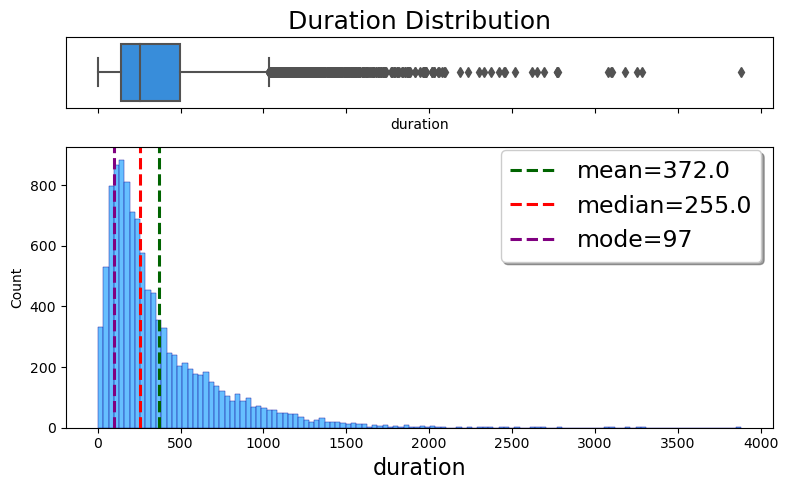

In [19]:
num_plot(df, 'duration', 'Duration Distribution', '')

**Previous Distribution**

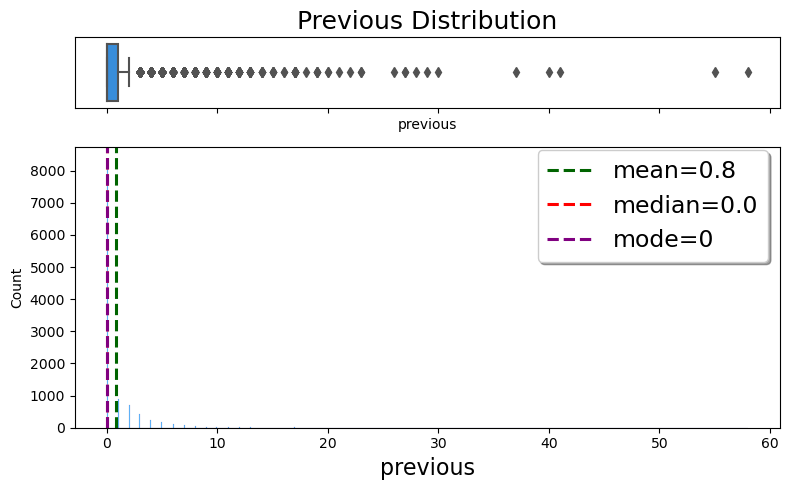

In [20]:
num_plot(df, 'previous', 'Previous Distribution', '')

### 2. Analysis of Categorical Variables

In [21]:
def cat_summary(dataframe, col_name, plot=False):
    # Create a DataFrame to show value counts and ratios
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    
    # Print the summary DataFrame
    print(summary_df)
    
    if plot:
        # Create a count plot if 'plot' is True
        sns.countplot(x=dataframe[col_name], data=dataframe ,palette="Set1")
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)
        
        # Display the plot
        plt.show(block=True)

**Jobs Analysis**

                job      Ratio
management     2566  22.988712
blue-collar    1944  17.416234
technician     1823  16.332199
admin.         1334  11.951263
services        923   8.269127
retired         778   6.970077
self-employed   405   3.628382
student         360   3.225228
unemployed      357   3.198352
entrepreneur    328   2.938541
housemaid       274   2.454757
unknown          70   0.627128


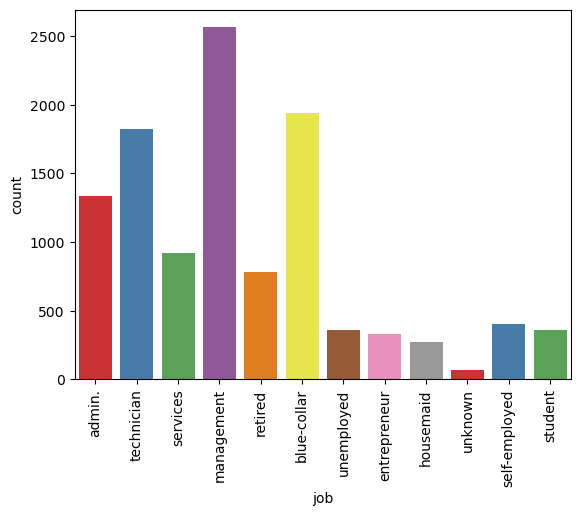

In [22]:
cat_summary(df, 'job', True)

- **Insight📊:**

  - Management and Blue-collar Job type Clients are maximum in the bank
  - There are very less number of student customers in the bank

**Marital Analysis**

          marital      Ratio
married      6351  56.898405
single       3518  31.517649
divorced     1293  11.583946


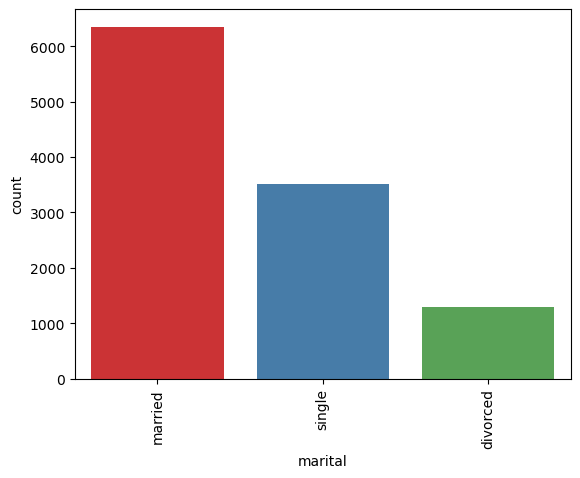

In [23]:
cat_summary(df, 'marital', True)

- **Insight📊:**

   - Most of the clients in the bank are Married - 56.9% and Single - 31.5%

**Education Analysis**

           education      Ratio
secondary       5476  49.059308
tertiary        3689  33.049633
primary         1500  13.438452
unknown          497   4.452607


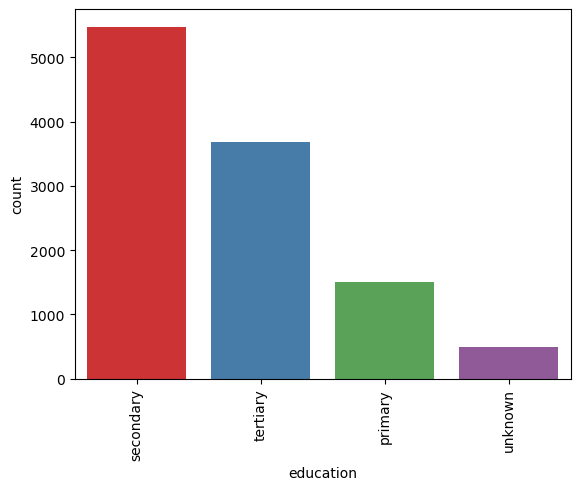

In [24]:
cat_summary(df, 'education', True)

- **Insight📊:**

  - Most of the customers in the bank are related to Secondary - 49.1% and Tertiary - 33% Category
  - only 13.4% of the clients are related to primary education category

**Housing Analysis**

     housing     Ratio
no      5881  52.68769
yes     5281  47.31231


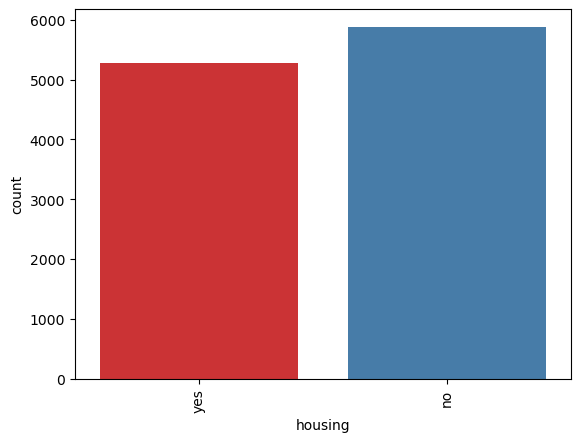

In [25]:
cat_summary(df, 'housing', True)

- **Insight📊:**
  - Dataset is well balanced

**Month Analysis**

     month      Ratio
may   2824  25.300125
aug   1519  13.608672
jul   1514  13.563877
jun   1222  10.947859
nov    943   8.448307
apr    923   8.269127
feb    776   6.952159
oct    392   3.511915
jan    344   3.081885
sep    319   2.857911
mar    276   2.472675
dec    110   0.985486


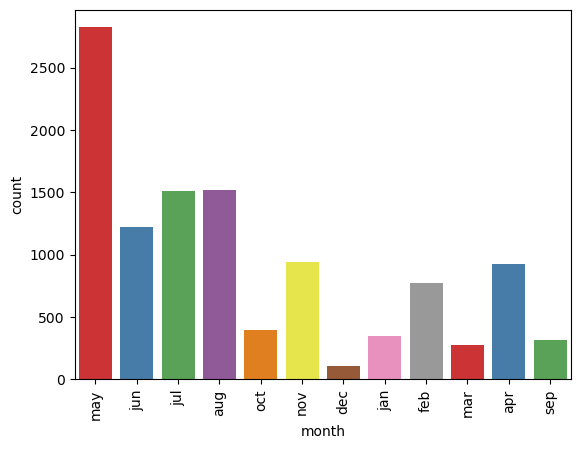

In [26]:
cat_summary(df, 'month', True)

- **Insight📊:**

  - Most of the clients in the bank are contacted in the months of May, Jun, Jul and in Aug last year.
  - very few of the clients are contacted in the months of Sep, Mar and in Dec

         poutcome      Ratio
unknown      8326  74.592367
failure      1228  11.001613
success      1071   9.595055
other         537   4.810966


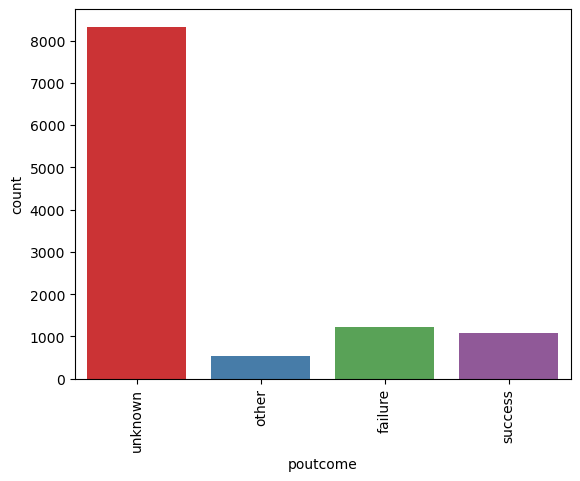

In [27]:
cat_summary(df, 'poutcome', True)

- **Insight📊:**

  - From the Outcomes of the previous marketing Campaign most of the results are Unknown ~ 74.6% and Failure ~ 11% .
  - Success rate is very less ~ 9.6%

           contact      Ratio
cellular      8042  72.048020
unknown       2346  21.017739
telephone      774   6.934241


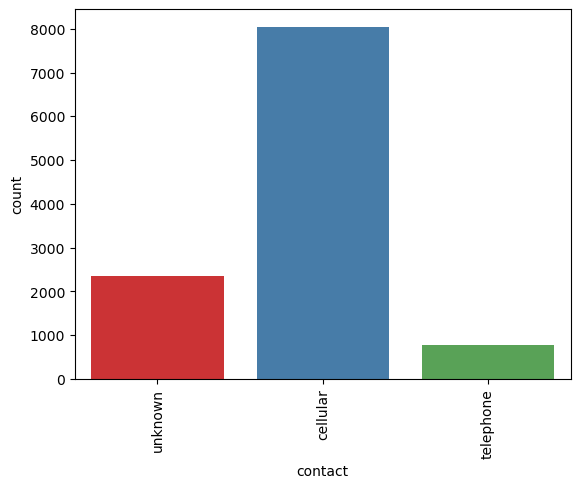

In [28]:
cat_summary(df, 'contact', True)

- **Insight📊:**

  - Most of the customers in the bank are contacted through Cellular - 72%
  - only 6.93% of the clients are contacted through telephone

**Our Target >> Deposit Analysis**

     deposit      Ratio
no      5873  52.616019
yes     5289  47.383981


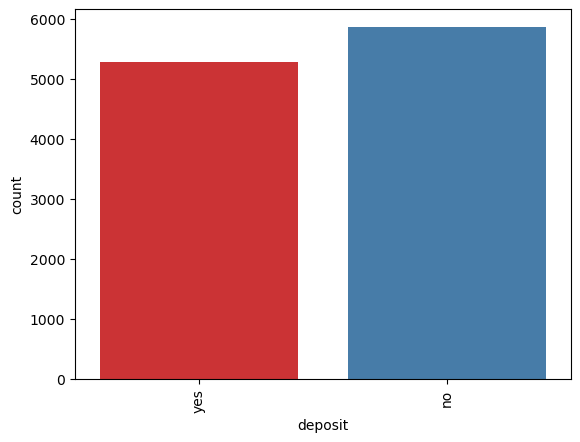

In [29]:
cat_summary(df, 'deposit', True)

- **Insight📊:**

  - From the Outcomes of the previous marketing Campaign 52.6% of the Clients are not subsribed for the Term Deposits.
  - only 47.4% are subsribed to the term deposi

### 4. Analysis Features together and finds relations

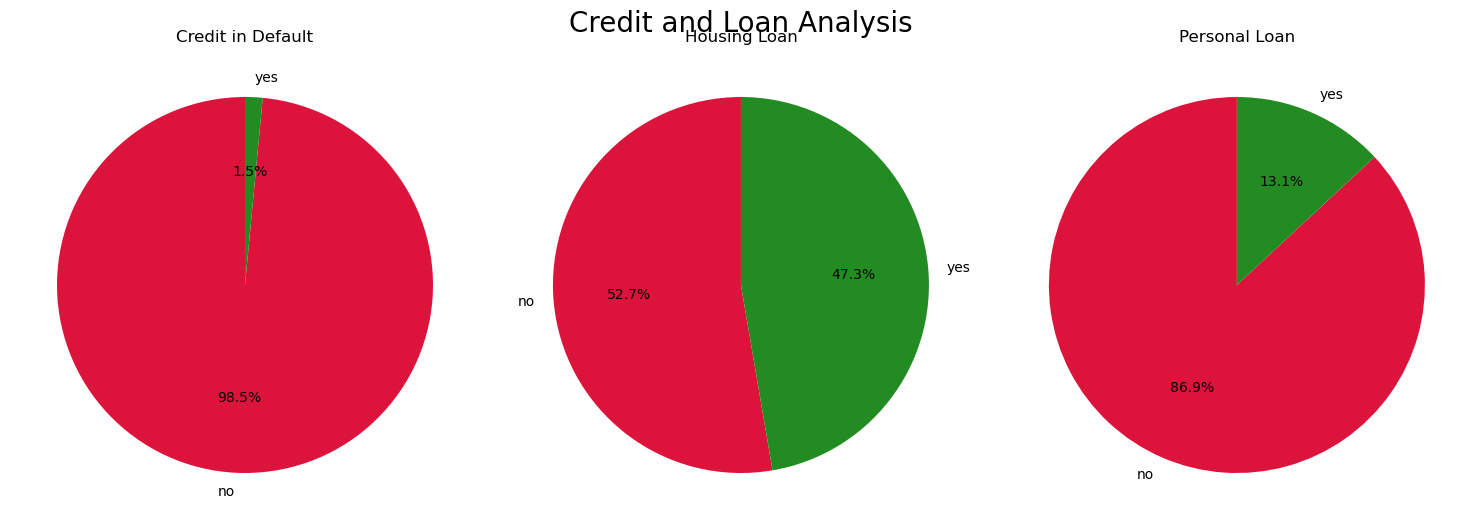

In [30]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart for 'default'
default_counts = df['default'].value_counts()
axes[0].pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=90, colors=['Crimson', 'ForestGreen'])
axes[0].set_title('Credit in Default')

# Pie chart for 'housing'
housing_counts = df['housing'].value_counts()
axes[1].pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=90, colors=['Crimson', 'ForestGreen'])
axes[1].set_title('Housing Loan')

# Pie chart for 'loan'
loan_counts = df['loan'].value_counts()
axes[2].pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=90, colors=['Crimson', 'ForestGreen'])
axes[2].set_title('Personal Loan')

# Adjust layout
plt.tight_layout()
plt.suptitle('Credit and Loan Analysis', fontsize=20, y=1.05)

# Show the plot
plt.show()

- **Insight📊:**

  - 98.5% customers in the bank doesn't have Credit in Default
  - 52.7% customers in the bank doesn't have Housing Loan
  - 86.9% customers in the bank doesn't have Personal Loan
  - on comparing with Personal Loan and Housing Loan, Most of the clients subscribed for Housing Loan - 47.3%

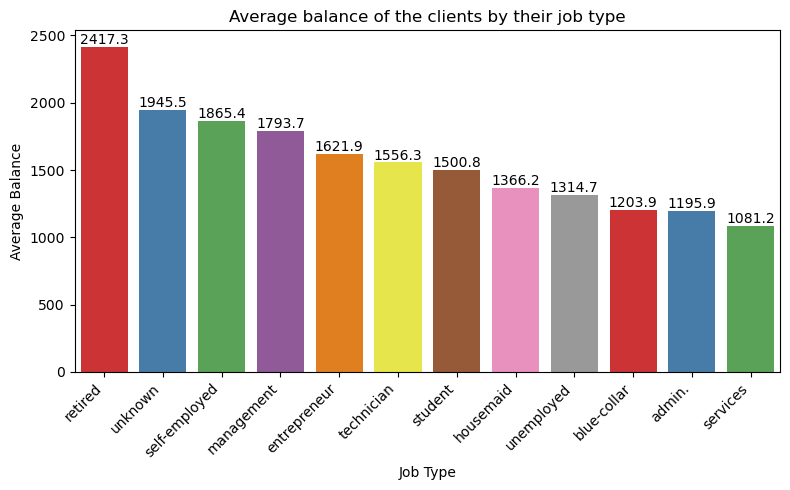

In [31]:
# Calculate the average balance by job
a = df.groupby(['job'])['balance'].mean().reset_index()
a['balance'] = round(a['balance'], 1)

# Sort the data by balance in descending order
a = a.sort_values(by='balance', ascending=False)

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='job', y='balance', data=a, palette="Set1")

# Add data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

# Set plot title and labels
plt.title('Average balance of the clients by their job type')
plt.xlabel('Job Type')
plt.ylabel('Average Balance')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

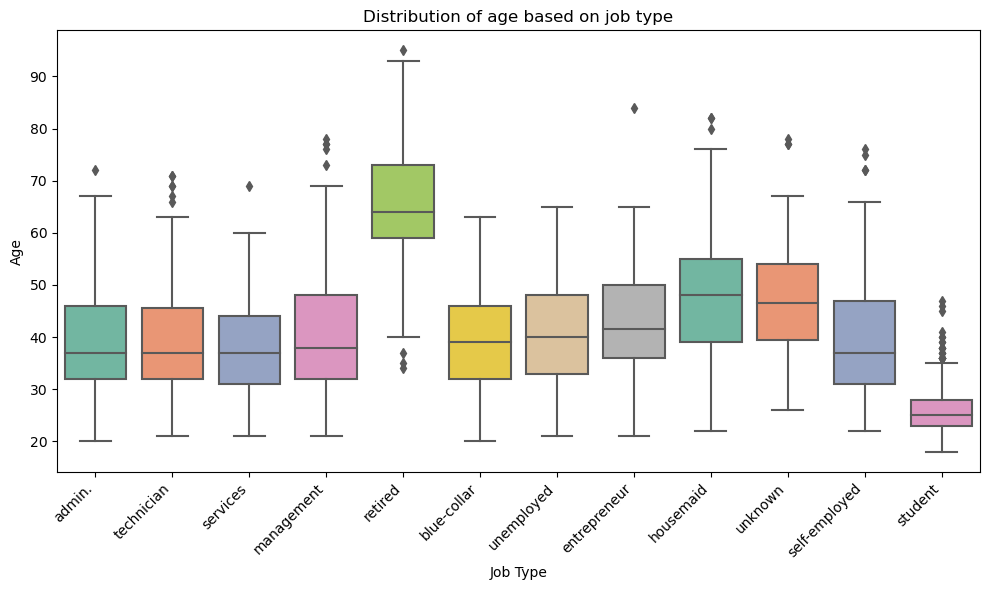

In [32]:
# Create the box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='age', data=df, palette='Set2')

# Set plot title and labels
plt.title('Distribution of age based on job type')
plt.xlabel('Job Type')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

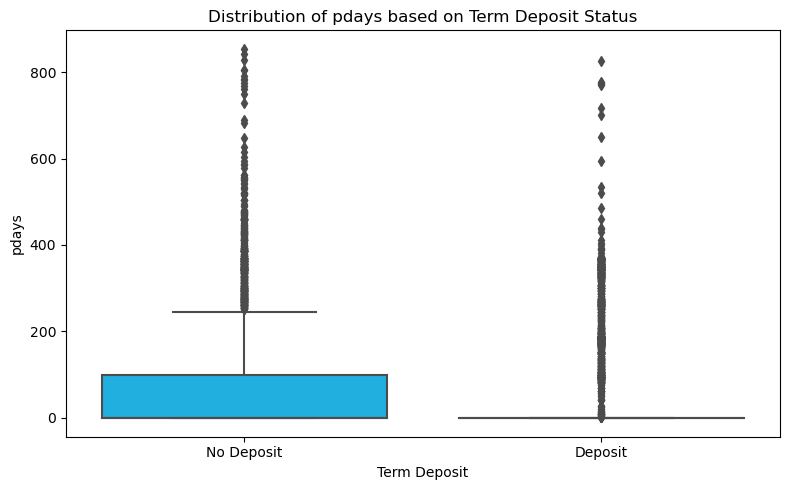

In [33]:
# Create the box plot using Seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(x='deposit', y='pdays', data=df, palette=['DeepSkyBlue', 'LightCoral'])

# Set plot title and labels
plt.title('Distribution of pdays based on Term Deposit Status')
plt.xlabel('Term Deposit')
plt.ylabel('pdays')
plt.xticks(ticks=[0, 1], labels=['No Deposit', 'Deposit'])

# Show the plot
plt.tight_layout()
plt.show()

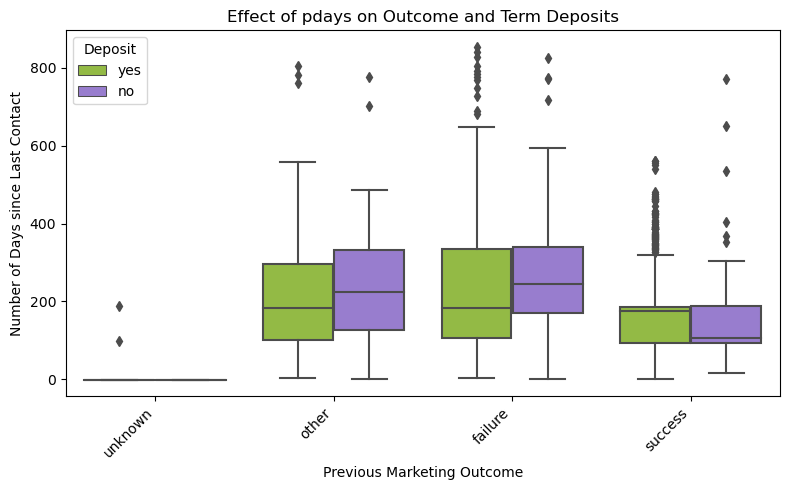

In [34]:
# Create the box plot using Seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(x='poutcome', y='pdays', hue='deposit', data=df, palette=['YellowGreen', 'MediumPurple'])

# Set plot title and labels
plt.title('Effect of pdays on Outcome and Term Deposits')
plt.xlabel('Previous Marketing Outcome')
plt.ylabel('Number of Days since Last Contact')
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend(title='Deposit')

# Show the plot
plt.tight_layout()
plt.show()

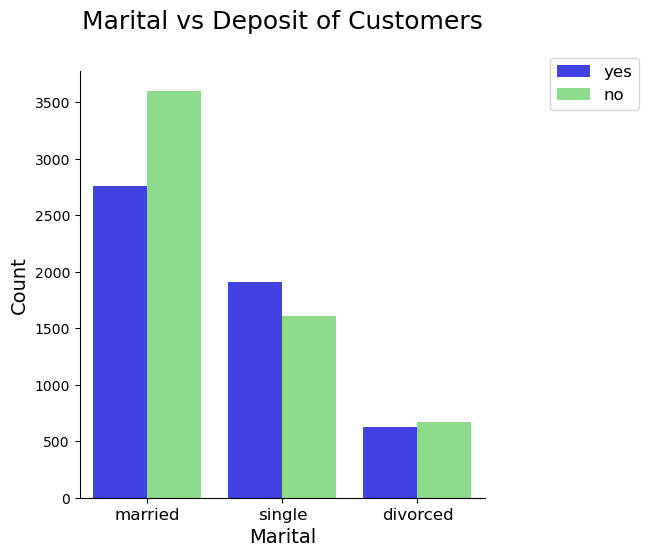

In [35]:
sns.catplot("marital", hue = 'deposit', data=df, kind="count", palette={'no':"#80e880", 'yes':"#2626ff"}, legend = False)
plt.title("Marital vs Deposit of Customers", size = 18, y=1.08) 
plt.xlabel("Marital", size = 14)
plt.ylabel("Count", size = 14)
plt.xticks(size = 12)
plt.legend( fontsize = 12,  bbox_to_anchor=(1.4,1.05))

plt.show()

- **Insight📊:**
  - Fewer married customers prefer to deposit.
  - Larger single customers prefer to deposit.

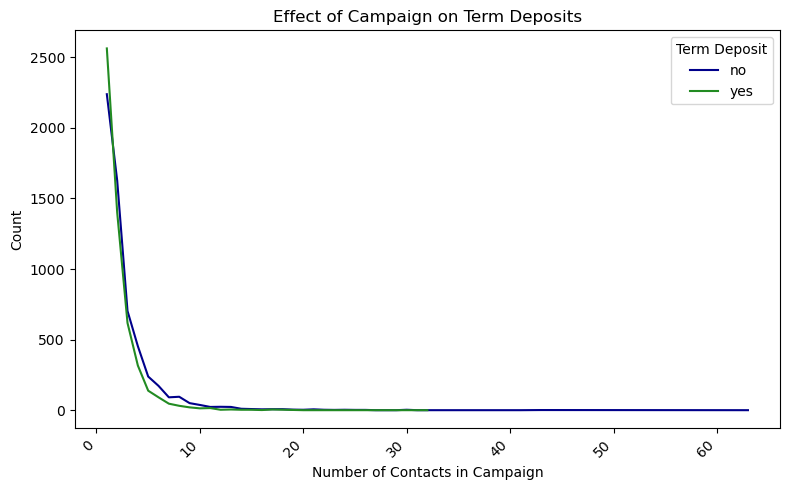

In [36]:
# Group the data and calculate the counts
campaign_counts = df.groupby(['campaign', 'deposit'])['age'].count().reset_index().rename(columns={'age': 'Count'})

# Create the line plot using Seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(x='campaign', y='Count', hue='deposit', data=campaign_counts, palette=['DarkBlue', 'ForestGreen'])

# Set plot title and labels
plt.title('Effect of Campaign on Term Deposits')
plt.xlabel('Number of Contacts in Campaign')
plt.ylabel('Count')
plt.legend(title='Term Deposit')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

- **Insight📊:**

  - From the analysis, with the increase in contacts performed for the clients in the campaign there is more chance for the client to unsubscribe the term deposit
  - It is better to perform less contacts to the client to make them subscribe to the term deposits

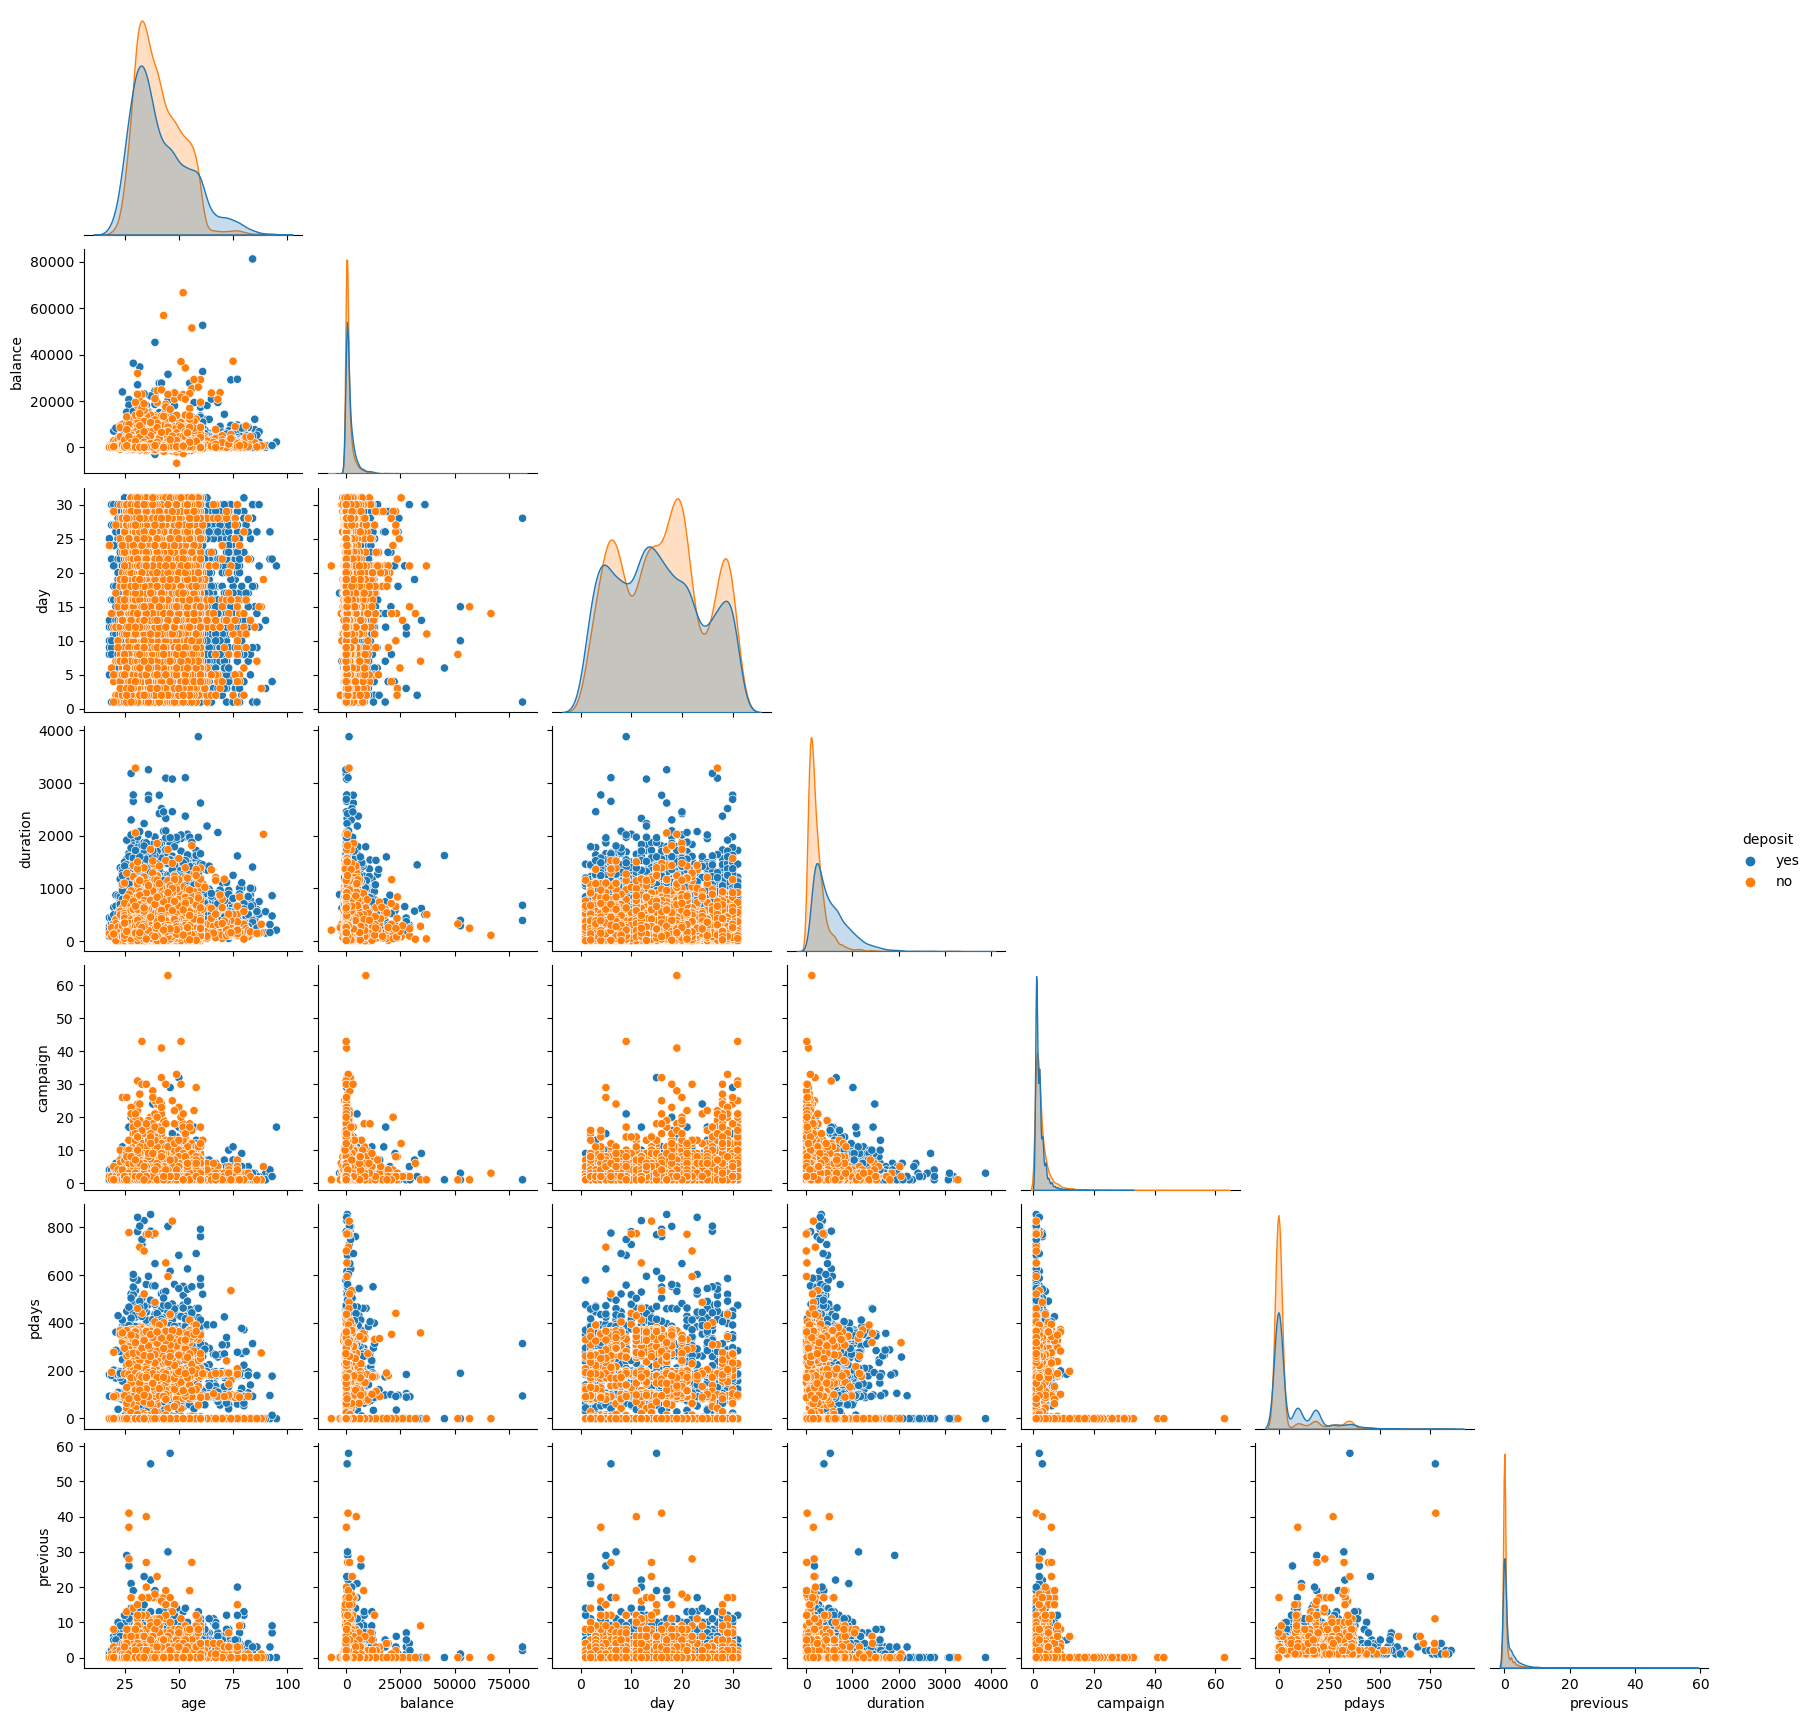

In [37]:
sns.pairplot(df,hue='deposit',corner=True)
plt.show()

## 5. Data preparation for ML algorithms (encoding) 🛠

- **In our Data we have some problems to handel✔️  :**
  - Change column Tpye to Category & Apply encoding
  - Check Outliers and remove negative values in the features (age , default, balance ,duration , pdays and previous)
  - Splitting data into train and test sets.
  

**1. Change column Tpye to Category & Apply encoding**

In [38]:
col_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'deposit', 'contact']

for col in col_list:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


**2. Check Outliers and remove negative values**

In [39]:
import scipy
import scipy.stats as stats

def outlier_cols(x): 
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    return col if (g_critical) < g_calculated else 0

In [40]:
import numpy as np

cols_with_outliers = []
for col in df.columns:
    outlier_col = outlier_cols(df[col])
    cols_with_outliers.append(outlier_col)

while (cols_with_outliers.count(0)):
    cols_with_outliers.remove(0)
print('Columns with outliers are: {}'.format(cols_with_outliers) )

Columns with outliers are: ['default', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [41]:
for col in cols_with_outliers:
    if col != 'pdays' and col != 'balance':    # pdays and balance have negative values, so scaling will result in NaNs
        df[col] = (df[col]**(1/3.7))

In [42]:
# Columns still possessing outliers
any_outlier_col = []
for col in cols_with_outliers:
    outlier_col = outlier_cols(df[col])
    any_outlier_col.append(outlier_col)

while (any_outlier_col.count(0)): 
    any_outlier_col.remove(0)
any_outlier_col

['default', 'balance', 'campaign', 'pdays', 'previous']

In [43]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")

In [44]:
for col in any_outlier_col:
    if col != 'pdays' and col != 'balance':
        df[col] = (df[col]**(3.7))  

In [45]:
# Removing outliers
cut_off = 11000
for i in df['balance']:
    if i >= cut_off:
        df['balance'] = df['balance'].replace(i, cut_off)

grubbs_test(df['balance'])

Grubbs Calculated Value: 4.377039763193229
Grubbs Critical Value: 4.585737088805695
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



In [46]:
# Removing outliers
cut_off = 12
for i in df['campaign']:
    if i >= cut_off:
        df['campaign'] = df['campaign'].replace(i, cut_off)

grubbs_test(df['campaign'])

Grubbs Calculated Value: 4.523836877301487
Grubbs Critical Value: 4.585737088805695
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



In [47]:
# Removing Outliers 
cut_off = 8
for i in df['previous']:
    if i >= cut_off:
        df['previous'] = df['previous'].replace(i, cut_off)

grubbs_test(df['previous'])

Grubbs Calculated Value: 4.3237475387753905
Grubbs Critical Value: 4.585737088805695
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



In [48]:
# Removing Outliers 
cut_off = 500
for i in df['pdays']:
    if i >= cut_off:
        df['pdays'] = df['pdays'].replace(i, cut_off)

grubbs_test(df['pdays'])

Grubbs Calculated Value: 4.278614474702936
Grubbs Critical Value: 4.585737088805695
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



In [49]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

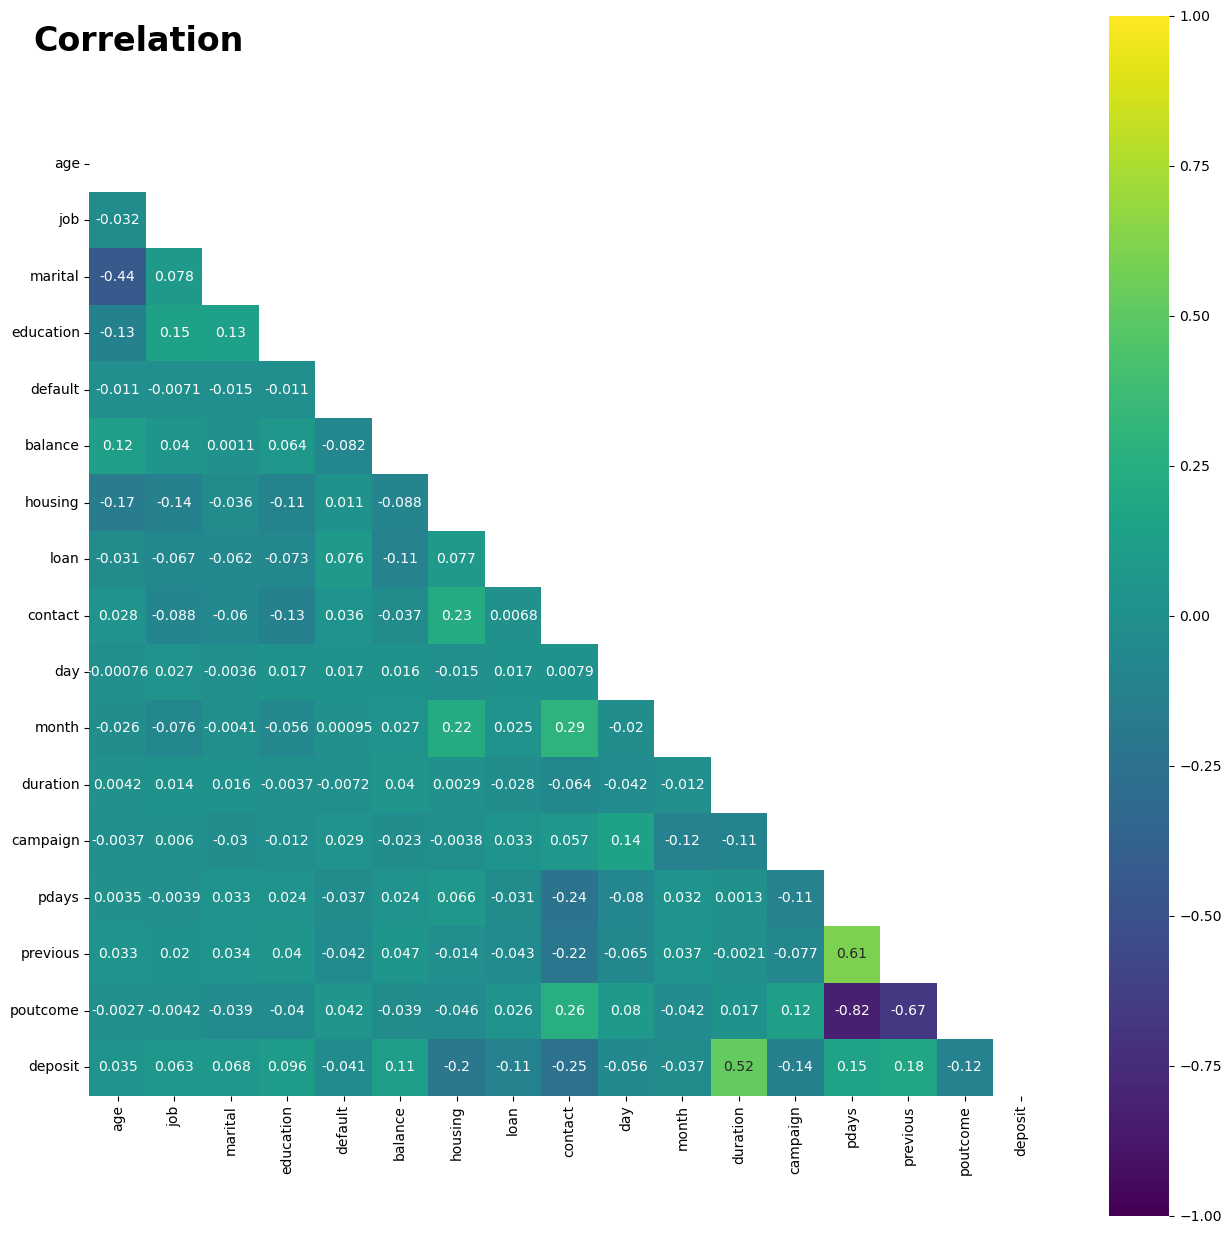

In [50]:
# fig
fig= plt.figure(figsize=(12, 12))

# mask
mask = np.triu(df.corr())

# axes 
axes = fig.add_axes([0, 0, 1, 1])
sns.heatmap(df.dropna().corr(), annot=True, mask=mask, square=True,fmt='.2g',vmin=-1, vmax=1, center= 0, cmap='viridis',
            linecolor='white', cbar_kws= {'orientation': 'vertical'}, ax=axes) 

# title
axes.text(-1, -1.5, 'Correlation', color='black', fontsize=24, fontweight='bold')

fig.show()

In [51]:
corr_matrix = df.corr()
corr_matrix['deposit'].sort_values()

contact     -0.249847
housing     -0.203888
campaign    -0.136598
poutcome    -0.122369
loan        -0.110580
day         -0.056326
default     -0.040680
month       -0.037121
age          0.034901
job          0.063395
marital      0.067610
education    0.095948
balance      0.110295
pdays        0.153562
previous     0.183557
duration     0.518332
deposit      1.000000
Name: deposit, dtype: float64

**3. Splitting data into train and test sets**

In [52]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 65)
for train_index, test_index in split.split(df, df['deposit']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
      
print(f"Rows in train set : {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set : 8929
Rows in test set: 2233



In [53]:
# train_set
train_labels = train_set["deposit"].copy()    # Storing feature in labels variable
train_set = train_set.drop(["deposit", 'default', 'job'], axis = 1)       # Dropping 'default' and 'job' column to improve accuracy

# test_set
test_labels = test_set["deposit"].copy()     # Storing feature in labels variable
test_set = test_set.drop(["deposit", 'default', 'job'], axis = 1)   # Dropping 'default' and 'job' column to improve accuracy

## 6- Building and training Model 0️⃣1️⃣

**ExtraTreesClassifier**

In [54]:
# Declaring and fitting classifier model
etc = ExtraTreesClassifier()
etc.fit(train_set, train_labels)
    
# Test set prediction
etc_predict = etc.predict(test_set)

# Evaluating predictions
etc_accuracy = accuracy_score(test_labels, etc_predict)
etc_cm = confusion_matrix(test_labels, etc_predict)

# Printing classification report 
print('ExtraTreesClassifier Report:\n')
print(classification_report(test_labels, etc_predict))
print('Accuracy of ExtraTreesClassifier is: {}'.format(etc_accuracy))

ExtraTreesClassifier Report:

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1175
           1       0.83      0.87      0.85      1058

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.86      0.85      0.85      2233

Accuracy of ExtraTreesClassifier is: 0.8540080609046127


**GradientBoostingClassifier**

In [55]:
# Declaring and fitting classifier model
gbc = GradientBoostingClassifier()
gbc.fit(train_set, train_labels)
    
# Test set prediction
gbc_predict = gbc.predict(test_set)

# Evaluating predictions
gbc_accuracy = accuracy_score(test_labels, gbc_predict)
gbc_cm = confusion_matrix(test_labels, gbc_predict)

# Printing classification report 
print('GradientBoostingClassifier Report:\n')
print(classification_report(test_labels, gbc_predict))
print('Accuracy of GradientBoostingCLassifier is: {}'.format(gbc_accuracy))

GradientBoostingClassifier Report:

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1175
           1       0.83      0.87      0.85      1058

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233

Accuracy of GradientBoostingCLassifier is: 0.8575906851768921


**CatBoostClassifier**

In [56]:
# Declaring classifier parameters

cbc_params = {'loss_function':'Logloss', 
          'eval_metric':'AUC', 
          'verbose': 200, 
          'random_seed': 1,
         }


# Declaring classifier model
cbc = CatBoostClassifier(**cbc_params)

# Fitting classifer to training set
cbc.fit(train_set, train_labels,               
          eval_set=(test_set, test_labels), 
          use_best_model=True, 
          plot=True 
);

# Predicting test set
cbc_predict = cbc.predict(test_set)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.05442
0:	test: 0.8592929	best: 0.8592929 (0)	total: 157ms	remaining: 2m 36s
200:	test: 0.9320460	best: 0.9320460 (200)	total: 1.06s	remaining: 4.22s
400:	test: 0.9325673	best: 0.9326815 (346)	total: 1.87s	remaining: 2.79s
600:	test: 0.9326204	best: 0.9330411 (527)	total: 2.67s	remaining: 1.78s
800:	test: 0.9312858	best: 0.9330411 (527)	total: 3.47s	remaining: 863ms
999:	test: 0.9298685	best: 0.9330411 (527)	total: 4.49s	remaining: 0us

bestTest = 0.933041065
bestIteration = 527

Shrink model to first 528 iterations.


In [57]:
# Evaluating predictions
cbc_accuracy = accuracy_score(test_labels, cbc_predict)
cbc_cm = confusion_matrix(test_labels, cbc_predict)

# Printing classification report 
print('CatBoostClassifier Report:\n')
print(classification_report(test_labels, cbc_predict))
print('Accuracy of CatBoostClassifier is: {}'.format(cbc_accuracy))

CatBoostClassifier Report:

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1175
           1       0.84      0.90      0.87      1058

    accuracy                           0.87      2233
   macro avg       0.87      0.87      0.87      2233
weighted avg       0.87      0.87      0.87      2233

Accuracy of CatBoostClassifier is: 0.8696820420958352


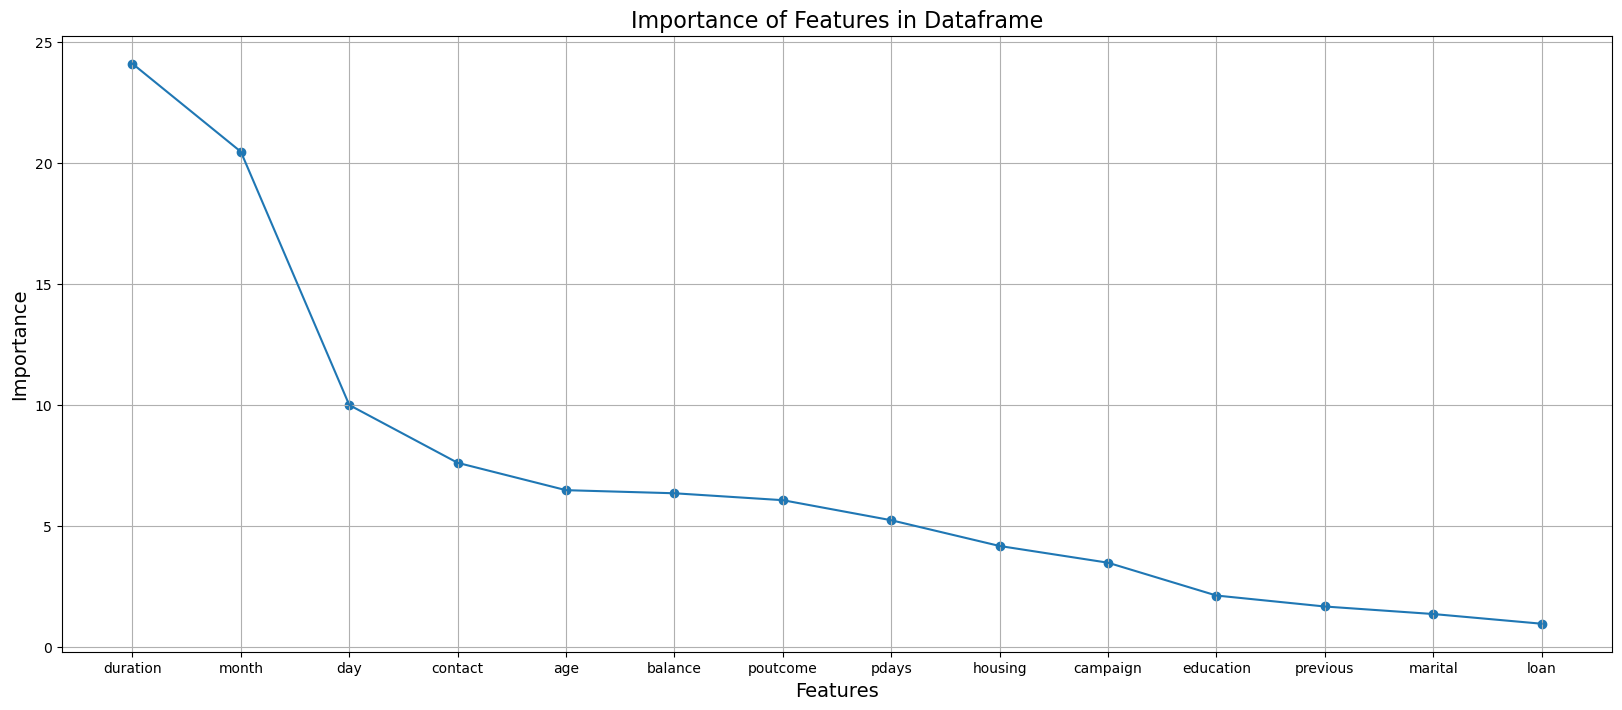

In [58]:
# Computing feature importance
feature_importances = pd.DataFrame(cbc.feature_importances_,
                                   index = train_set.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

# Plotting feature importance
plt.figure(figsize=(20,8))
plt.plot(feature_importances)
plt.scatter(y=feature_importances.importance,x=feature_importances.index)
plt.title('Importance of Features in Dataframe', fontsize = 16)
plt.ylabel('Importance', fontsize=14)
plt.xlabel('Features', fontsize = 14)
plt.grid()
plt.show()

In [59]:
# Assigning categorical features
cat_features = [1, 2, 3, 7, 8]  

# Declaring classifer parameters
cbc_params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': cat_features,
          'verbose': 200,
          'random_seed': 1,
          'iterations': 1000,
          'max_depth': 7    
         }

# Declaring model
cbc_improved = CatBoostClassifier(**cbc_params)

# Fitting model to train set 
cbc_improved.fit(train_set, train_labels,
          eval_set=(test_set, test_labels),
          use_best_model=True,
          plot=True
         );

# Predicting test set
cbc_improved_predict = cbc_improved.predict(test_set)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.05442
0:	test: 0.8830994	best: 0.8830994 (0)	total: 54.9ms	remaining: 54.9s
200:	test: 0.9341326	best: 0.9342509 (196)	total: 5s	remaining: 19.9s
400:	test: 0.9359345	best: 0.9359345 (400)	total: 10.2s	remaining: 15.2s
600:	test: 0.9362595	best: 0.9364767 (587)	total: 16.2s	remaining: 10.7s
800:	test: 0.9359514	best: 0.9364767 (587)	total: 22s	remaining: 5.47s
999:	test: 0.9364960	best: 0.9365378 (997)	total: 27.8s	remaining: 0us

bestTest = 0.9365378273
bestIteration = 997

Shrink model to first 998 iterations.


In [60]:
# Evaluating predictions
cbc_improved_accuracy = accuracy_score(test_labels, cbc_improved_predict)
cbc_improved_cm = confusion_matrix(test_labels, cbc_improved_predict)

# Printing classification report 
print('CatBoostClassifier Report:\n')
print(classification_report(test_labels, cbc_improved_predict))
print('Accuracy of CatBoostClassifier is: {}'.format(cbc_improved_accuracy))

CatBoostClassifier Report:

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1175
           1       0.84      0.91      0.87      1058

    accuracy                           0.88      2233
   macro avg       0.88      0.88      0.88      2233
weighted avg       0.88      0.88      0.88      2233

Accuracy of CatBoostClassifier is: 0.8768472906403941


**Visualize Results 📈**

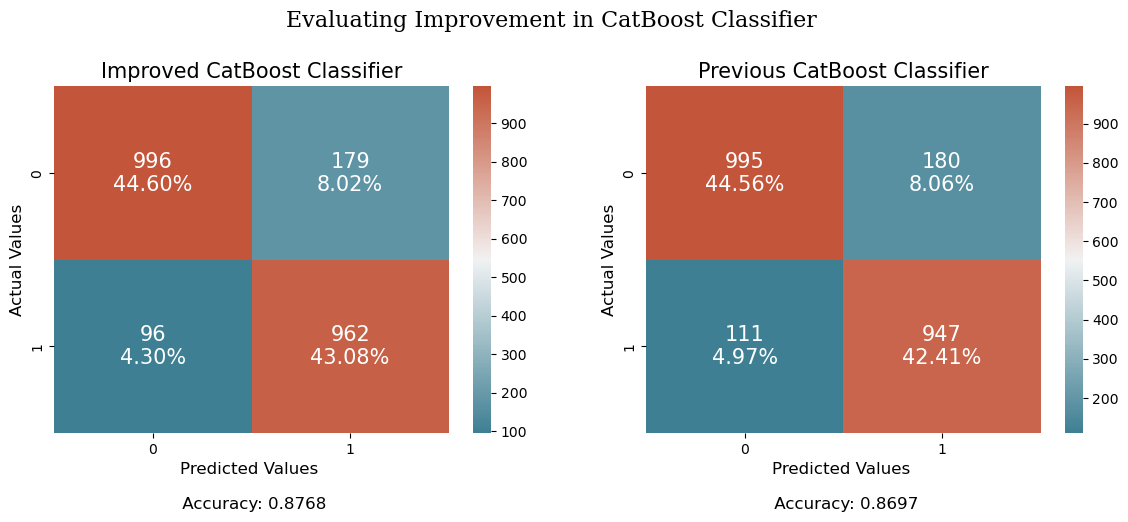

In [61]:
# Define the colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(14, 4.5))
title = plt.suptitle("Evaluating Improvement in CatBoost Classifier", family='Serif', size=16, ha='center')
title.set_position([0.48, 1.05])

# ------------ subplot #1 ----------------
plt.subplot(121)
plt.title('Improved CatBoost Classifier', size=15)

# Declaring heatmap labels
group_counts = ['{0:0.0f}'.format(value) for value in cbc_improved_cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cbc_improved_cm.flatten() / np.sum(cbc_improved_cm)]

labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plotting heatmap
sns.heatmap(cbc_improved_cm, annot=labels, annot_kws={"size": 15}, fmt='', cmap=cmap)

# Adding figure labels
plt.ylabel('Actual Values', size=12)
plt.xlabel('Predicted Values \n \n Accuracy: {}'.format(round(cbc_improved_accuracy, 4)), size=12)

# ------------ subplot #2 ----------------
plt.subplot(122)
plt.title('Previous CatBoost Classifier', size=15)

# Declaring heatmap labels
group_counts = ['{0:0.0f}'.format(value) for value in cbc_cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cbc_cm.flatten() / np.sum(cbc_cm)]

labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plotting heatmap
sns.heatmap(cbc_cm, annot=labels, annot_kws={"size": 15}, fmt='', cmap=cmap)

# Adding figure labels
plt.ylabel('Actual Values', size=12)
plt.xlabel('Predicted Values \n \n Accuracy: {}'.format(round(cbc_accuracy, 4)), size=12)

plt.show()

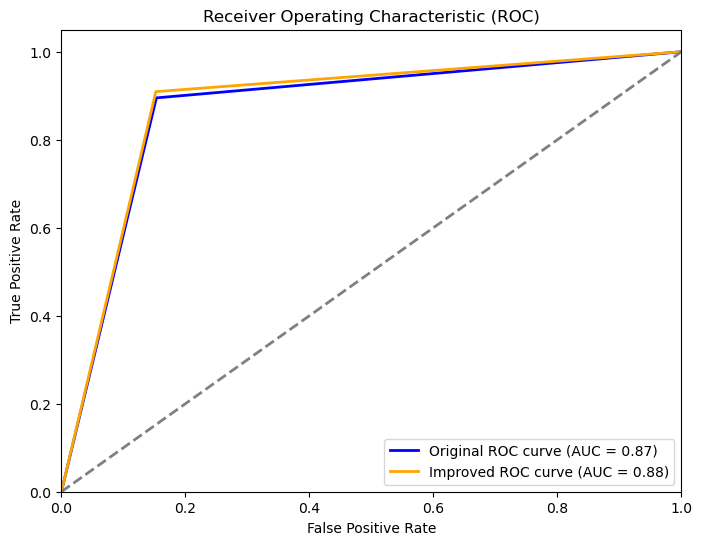

In [62]:
# Compute ROC curve and AUC for the original CatBoostClassifier
fpr, tpr, thresholds = roc_curve(test_labels, cbc_predict)
roc_auc = auc(fpr, tpr)

# Compute ROC curve and AUC for the improved CatBoostClassifier
fpr_improved, tpr_improved, thresholds_improved = roc_curve(test_labels, cbc_improved_predict)
roc_auc_improved = auc(fpr_improved, tpr_improved)
# fig
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Original ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr_improved, tpr_improved, color='orange', lw=2, label='Improved ROC curve (AUC = {:.2f})'.format(roc_auc_improved))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

- **Insight📊:**

   - There is increase in true positives.
   - False positives have reduced by optimizing the parameters of CatBoostClassifier.

## 7- Results Summary📝

- People who are younger than 30 and older than 60 years old are most likely to subscribe to term deposits.<br>
- Age attribute confirmed with job attribute. Because Retired Students are most likely to subscribe for term deposits.<br>
- Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposits.<br>
- Divorced have a considerably low amount of balance.<br>
- Education significantly impacts the amount of balance.<br>
- Customers are more willing to invest either before the 8th or after the 23rd of the month.<br>
- Potential clients opted to subscribe to term deposits during fall and winter.<br>
- Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for him or her to subscribe to a term deposit account. However, we see that potential clients with average and high balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances to increase the likelihood of subscribing to a term deposit.